In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import seaborn as sns
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.8, rc={"lines.linewidth": 1.8})


In [44]:
# Parameters
num_particles = 70  # Number of particles
num_steps = 200  # Number of steps in the simulation
dt = 0.1  # Time step
# alpha = 1e-4  # Thermal diffusivity (no longer needed)
# step_size = np.sqrt(2 * alpha * dt)  # Step size for random walk (no longer needed)

# Advective parameters
q_z = 0.01  # Vertical flux (positive for downward)
rho_w_c_w = 4181  # Volumetric heat capacity of water (J/m³K)
rho_c = 2500  # Volumetric heat capacity of water-sediment mix (J/m³K)
V_T = -q_z * (rho_w_c_w / rho_c)  # Advective thermal velocity

# Initial positions of particles (centered at the origin but spread out)
particles = np.random.uniform(-0.05, 0.04, (num_particles, 2))
temperature = np.ones(num_particles) * 100  # Initial temperature

In [45]:
def update_particles(particles, temperature, V_T, dt):
    # No random walk component
    advective_step = V_T * dt * np.array([0, -1])  # Downward advective step
    new_positions = particles + advective_step
    temperature *= np.exp(-dt)  # Simulate cooling over time
    return new_positions, temperature

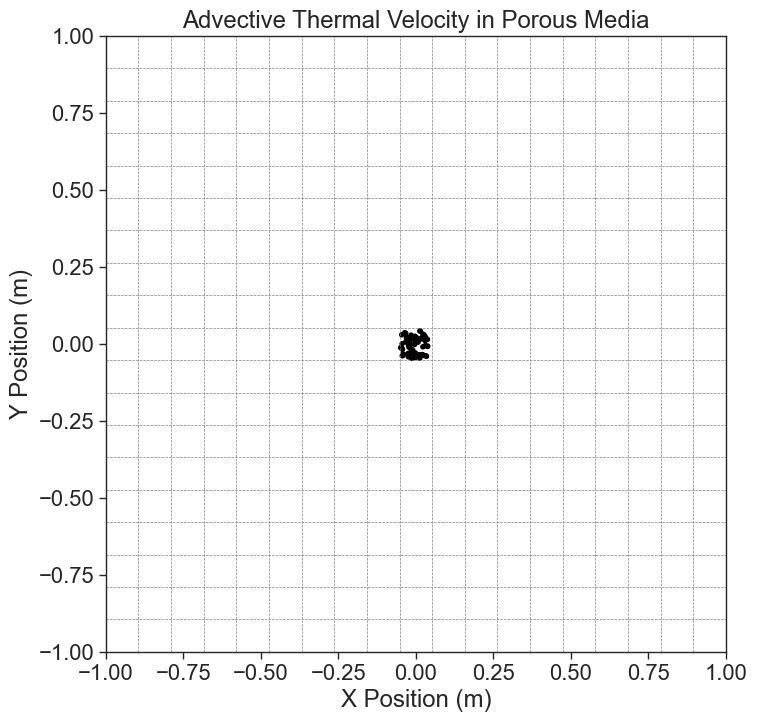

In [46]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))
scat = ax.scatter(particles[:, 0], particles[:, 1], s=10, c=temperature, cmap='hot', edgecolor='k')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('X Position (m)')
ax.set_ylabel('Y Position (m)')
ax.set_title('Advective Thermal Velocity in Porous Media')

# Background grid to represent the porous media
for y in np.linspace(-1, 1, 20):
    ax.axhline(y, color='gray', linestyle='--', linewidth=0.5)
for x in np.linspace(-1, 1, 20):
    ax.axvline(x, color='gray', linestyle='--', linewidth=0.5)

# Animation function
def animate(frame):
    global particles, temperature
    particles, temperature = update_particles(particles, temperature, V_T, dt)
    scat.set_offsets(particles)
    scat.set_array(temperature)
    return scat,

# Create animation
anim = FuncAnimation(fig, animate, frames=num_steps, interval=50, blit=True)


In [39]:
# Save the animation as a GIF
writer = PillowWriter(fps=20)
anim.save("2newadvective_thermal_velocity_hyporheic_zone.gif", writer=writer)

# Display the animation
plt.show()
